Задача №1

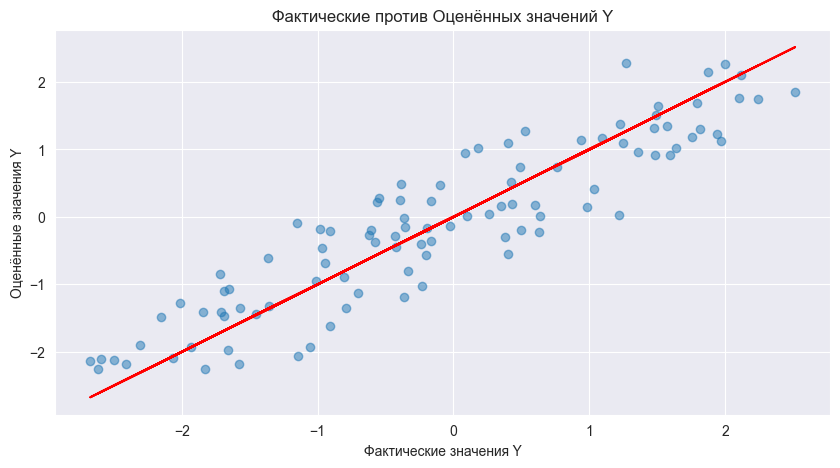

<Figure size 1000x500 with 0 Axes>

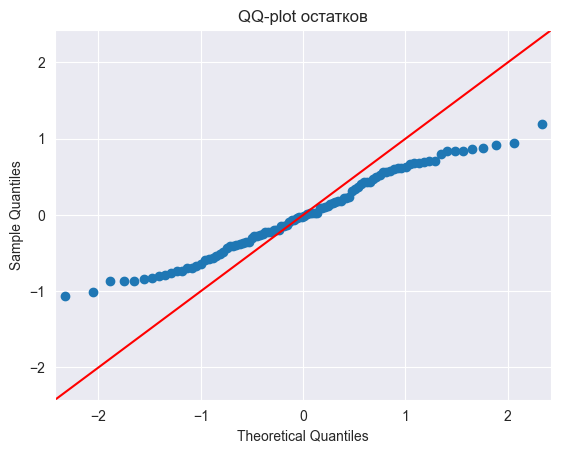

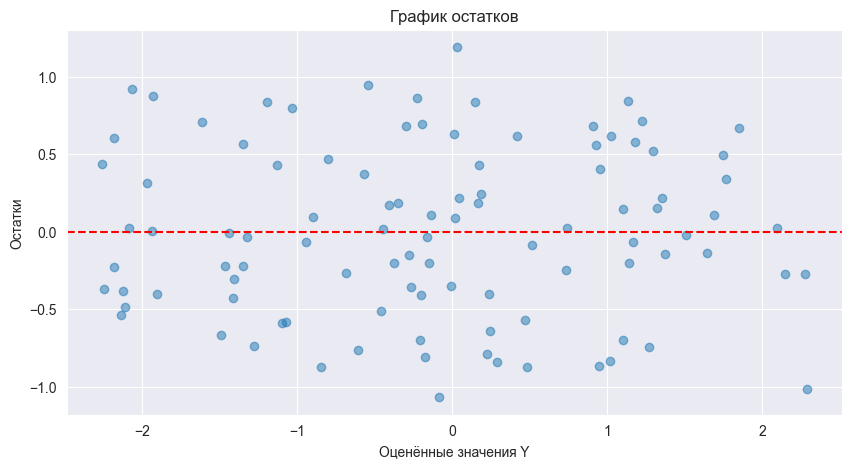

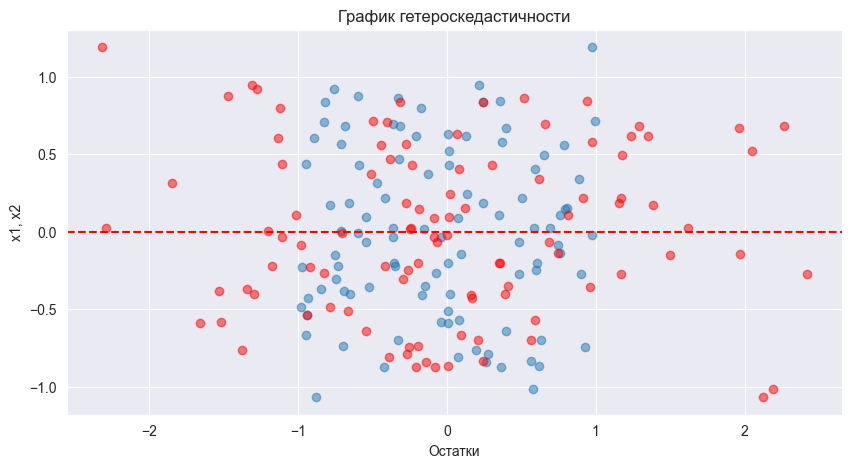

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     249.6
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           5.66e-39
Time:                        11:48:12   Log-Likelihood:                -80.285
No. Observations:                 100   AIC:                             166.6
Df Residuals:                      97   BIC:                             174.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0445      0.055     -0.809      0.421      -0.154       0.065
x1             1.5922      0.097     16.491      0.000       1.401       1.784
x2             0.6404      0.054     11.818      0.000       0.533       0.748
==============================================================================
Omnibus:                       10.956   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.738
Skew:                           0.046   Prob(JB):                        0.154
Kurtosis:                       2.057   Cond. No.                         1.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from itertools import product

import pc
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
N = 100
x2 = np.random.normal(0, 1, N)
x1 = np.random.uniform(-1, 1, N)
eps = np.random.uniform(-1, 1, N)

y = []

for i in range(N):
    y.append(1.5*x1[i]+ 0.5*x2[i] + eps[i])

X = sm.add_constant(np.column_stack((x1, x2)))

# Построение МНК модели
model = sm.OLS(y, X).fit()

# Построение графиков
# График оценённых значений Y
plt.figure(figsize=(10, 5))
plt.scatter(y, model.predict(X), alpha=0.5)
plt.plot(y, y, color='red')  # Идеальная линия соответствия
plt.title('Фактические против Оценённых значений Y')
plt.xlabel('Фактические значения Y')
plt.ylabel('Оценённые значения Y')
plt.show()

# QQ-plot для остатков
plt.figure(figsize=(10, 5))
sm.qqplot(model.resid, line='45')
plt.title('QQ-plot остатков')
plt.show()

# График остатков
plt.figure(figsize=(10, 5))
plt.scatter(model.predict(X), model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Оценённые значения Y')
plt.ylabel('Остатки')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x1, model.resid, alpha=0.5)
plt.scatter(x2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1, x2')
plt.show()


# Выводим результаты модели
model_summary = model.summary()
model_summary

Задача №2

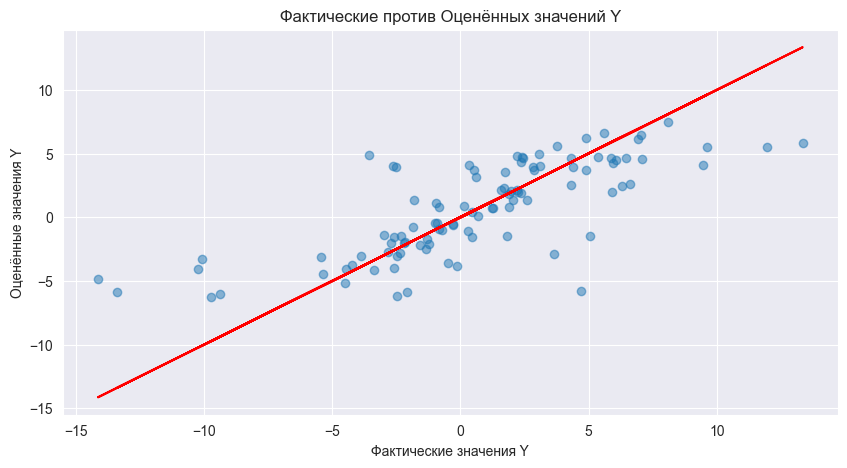

<Figure size 1000x500 with 0 Axes>

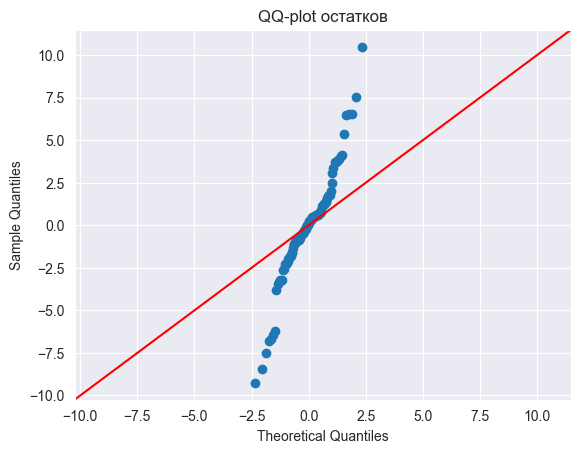

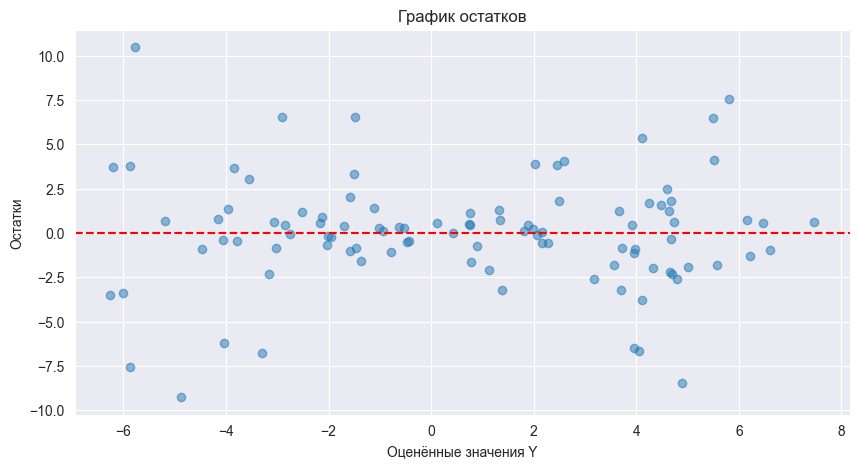

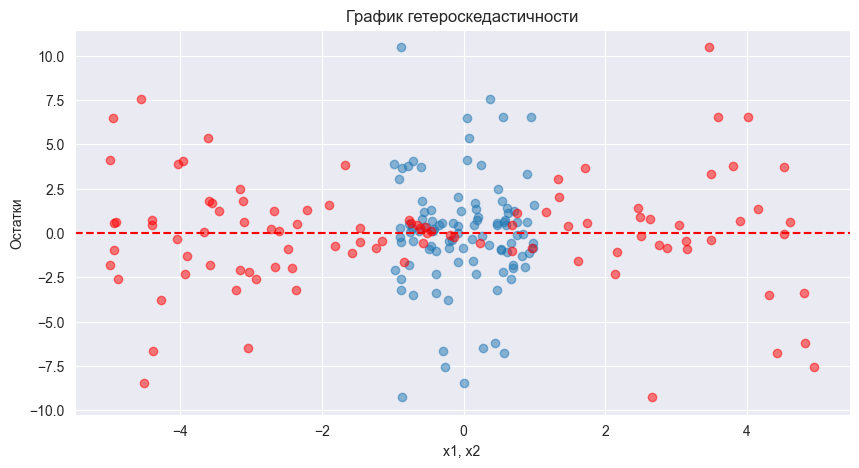


 Тест Голдфелда–Куандта r^2 from x:  (1.6050956133059588, 0.05413760956791894, 'increasing')
Тест Уайта r^2 from x:  (18.524779682477188, 0.002355765732979747, 4.274500353276982, 0.001512209106112678)
Тест Бреуша–Пэгана  r^2 from x1:  (2.3638398153345563, 0.3066893577543431, 1.1742189658717475, 0.3134140957381367)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     64.57
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.49e-18
Time:                        13:04:17   Log-Likelihood:                -256.82
No. Observations:                 100   AIC:                             519.6
Df Residuals:                      97   BIC:                             527.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0611      0.326      0.188      0.852      -0.585       0.707
x1             2.3933      0.538      4.445      0.000       1.325       3.462
x2            -1.0700      0.104    -10.328      0.000      -1.276      -0.864
==============================================================================
Omnibus:                        7.144   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.028   Jarque-Bera (JB):               13.164
Skew:                          -0.053   Prob(JB):                      0.00139
Kurtosis:                       4.774   Cond. No.                         5.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv


N = 100
eps = np.random.normal(0, 1, N)
x1 = np.random.uniform(-1, 1, N)
x2 = np.random.uniform(-5, 5, N)

y = []

for i in range(N):
    y.append(2*x1[i] - x2[i] + eps[i]*(x1[i]**2 + x2[i]))

X = sm.add_constant(np.column_stack((x1, x2)))

# Построение МНК модели
model = sm.OLS(y, X).fit()

# Построение графиков
# График оценённых значений Y
plt.figure(figsize=(10, 5))
plt.scatter(y, model.predict(X), alpha=0.5)
plt.plot(y, y, color='red')  # Идеальная линия соответствия
plt.title('Фактические против Оценённых значений Y')
plt.xlabel('Фактические значения Y')
plt.ylabel('Оценённые значения Y')
plt.show()

# QQ-plot для остатков
plt.figure(figsize=(10, 5))
sm.qqplot(model.resid, line='45')
plt.title('QQ-plot остатков')
plt.show()

# График остатков
plt.figure(figsize=(10, 5))
plt.scatter(model.predict(X), model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Оценённые значения Y')
plt.ylabel('Остатки')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x1, model.resid, alpha=0.5)
plt.scatter(x2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('x1, x2')
plt.show()




test02 = ssa.het_goldfeldquandt(model.resid, X)
print( "\n Тест Голдфелда–Куандта r^2 from x: ", test02)

test11 = ssa.het_white(model.resid, X)
print("Тест Уайта r^2 from x: ",test11)

test21 = ssa.het_breuschpagan(model.resid, X)
print("Тест Бреуша–Пэгана  r^2 from x1: ",test21)


# Выводим результаты модели
model_summary = model.summary()
model_summary

Задача №3

<Figure size 1000x500 with 0 Axes>

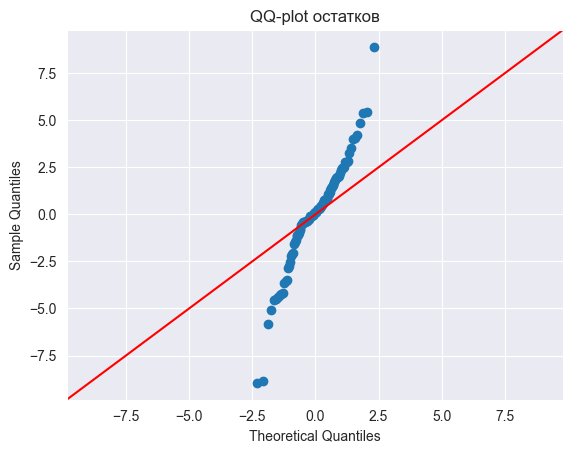

Харке–Берра:  SignificanceResult(statistic=17.686227048498406, pvalue=0.00014437253877936157) 
 Шапиро–Уилка:  ShapiroResult(statistic=0.9531881495562887, pvalue=0.0013537105873631795)


In [16]:
import pc
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
N = 100
eps = np.random.normal(0, 1, N)
x1 = np.random.uniform(-1, 1, N)
x2 = np.random.uniform(-5, 5, N)

y = []

for i in range(N):
    y.append(2*x1[i] - x2[i] + eps[i]*(x1[i]**2 + x2[i]))

X = sm.add_constant(np.column_stack((x1, x2)))

# Построение МНК модели
model = sm.OLS(y, X).fit()

# # Построение графиков
# # График оценённых значений Y
# plt.figure(figsize=(10, 5))
# plt.scatter(y, model.predict(X), alpha=0.5)
# plt.plot(y, y, color='red')  # Идеальная линия соответствия
# plt.title('Фактические против Оценённых значений Y')
# plt.xlabel('Фактические значения Y')
# plt.ylabel('Оценённые значения Y')
# plt.show()

# QQ-plot для остатков
plt.figure(figsize=(10, 5))
sm.qqplot(model.resid, line='45')
plt.title('QQ-plot остатков')
plt.show()

# # График остатков
# plt.figure(figsize=(10, 5))
# plt.scatter(model.predict(X), model.resid, alpha=0.5)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.title('График остатков')
# plt.xlabel('Оценённые значения Y')
# plt.ylabel('Остатки')
# plt.show()
# 
# plt.figure(figsize=(10, 5))
# plt.scatter(x1, model.resid, alpha=0.5)
# plt.scatter(x2, model.resid,color = 'r', alpha=0.5)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.title('График гетероскедастичности')
# plt.xlabel('Остатки')
# plt.ylabel('x1, x2')
# plt.show()
test1 = sps.jarque_bera(model.resid)
test2 = sps.shapiro(model.resid)
print("Харке–Берра: ",test1, "\n Шапиро–Уилка: ", test2)


# # Выводим результаты модели
# model_summary = model.summary()
# model_summary

Задача №4

0.6517370548904663


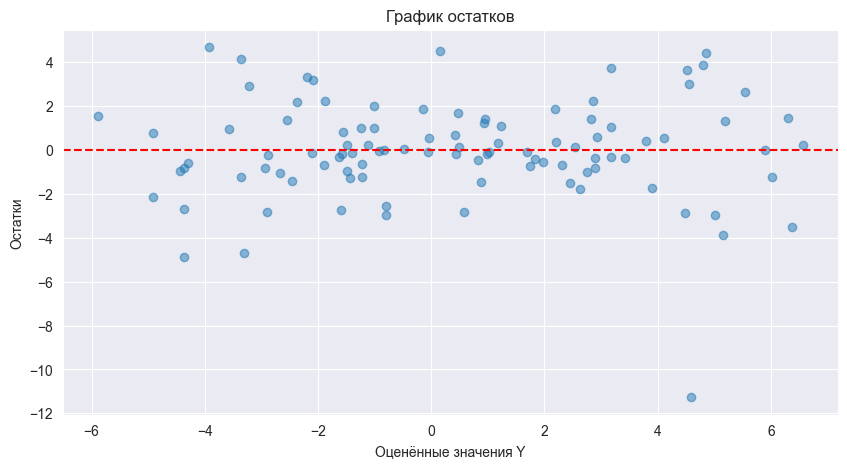

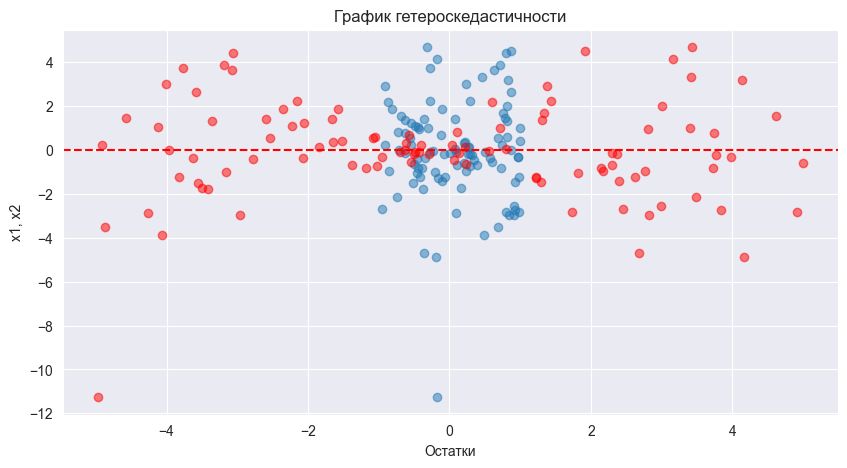

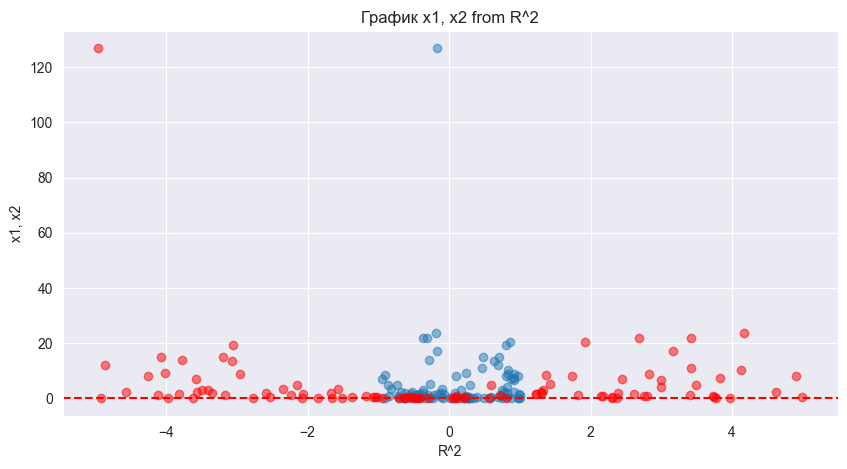

Тест Голдфелда–Куандта r^2 from x:  (8.589723998119043, 6.4717894817172845e-12, 'increasing')
Тест Уайта r^2 from x1:  (13.579188197490776, 0.018515423135283777, 2.954019208894012, 0.01603785334851988)
Тест Бреуша–Пэгана  r^2 from x1:  (3.3066147714722605, 0.19141577473309937, 1.6585500242584317, 0.19576863295640975)
Харке–Берра:  SignificanceResult(statistic=119.66282688780214, pvalue=1.0364474725997848e-26) 
 Шапиро–Уилка:  ShapiroResult(statistic=0.9253903728326544, pvalue=2.751146105073001e-05)


In [30]:
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
N = 100
eps = np.random.normal(0, 1, N)
x1 = np.random.uniform(-1, 1, N)
x2 = np.random.uniform(-5, 5, N)

y = []

for i in range(N):
    y.append(2*x1[i] - x2[i] + eps[i]*(x1[i]**2 + x2[i]))

X = sm.add_constant(np.column_stack((x1, x2)))

# Построение МНК модели
model = sm.OLS(y, X).fit()

# # Построение графиков
# # График оценённых значений Y
# plt.figure(figsize=(10, 5))
# plt.scatter(y, model.predict(X), alpha=0.5)
# plt.plot(y, y, color='red')  # Идеальная линия соответствия
# plt.title('Фактические против Оценённых значений Y')
# plt.xlabel('Фактические значения Y')
# plt.ylabel('Оценённые значения Y')
# plt.show()

# # QQ-plot для остатков
# plt.figure(figsize=(10, 5))
# sm.qqplot(model.resid, line='45')
# plt.title('QQ-plot остатков')
# plt.show()

print(model.rsquared)

# # График остатков
plt.figure(figsize=(10, 5))
plt.scatter(model.predict(X), model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Оценённые значения Y')
plt.ylabel('Остатки')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x1, model.resid, alpha=0.5)
plt.scatter(x2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1, x2')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x1, model.resid**2, alpha=0.5)
plt.scatter(x2, model.resid**2,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График x1, x2 from R^2')
plt.xlabel('R^2')
plt.ylabel('x1, x2')
plt.show()

test01 = ssa.het_goldfeldquandt(model.resid**2, X)
print("Тест Голдфелда–Куандта r^2 from x: ",test01)

test11 = ssa.het_white(model.resid**2, X)
print("Тест Уайта r^2 from x1: ",test11)

test21 = ssa.het_breuschpagan(model.resid**2, X)
print("Тест Бреуша–Пэгана  r^2 from x1: ",test21)



test1 = sps.jarque_bera(model.resid)
test2 = sps.shapiro(model.resid)


print("Харке–Берра: ",test1, "\n Шапиро–Уилка: ", test2)


# # Выводим результаты модели
# model_summary = model.summary()
# model_summary

In [40]:

N = 4
count = 0
for numbers in product(range(1, 7), repeat=N):
    if len(set(numbers)) < N: 
        count += 1
count

        

NameError: name 'product' is not defined

In [41]:
import sympy as sp

# Определяем символ N
N = sp.symbols('N')

# Математическое ожидание для одного броска кубика
E_single = sum(range(1, 7)) / 6

# Математическое ожидание количества пар с одинаковым результатом
# Каждая пара может появиться с вероятностью 1/6 (поскольку на кубике 6 граней)
# и у нас есть (N choose 2) = N*(N-1)/2 возможных пар
E_pairs = (N * (N - 1) / 2) * (1 / 6)

# Дисперсия для одного броска кубика
Var_single = sum([(i - E_single)**2 for i in range(1, 7)]) / 6

# Дисперсия для числа пар, где вычисляется по формуле дисперсии биномиального распределения:
# Var(X) = n*p*(1-p), где n - число испытаний, p - вероятность успеха в одном испытании
# В нашем случае "успех" - это событие, что пара участников выпадает с одинаковым числом очков
p = 1/6
n_pairs = N * (N - 1) / 2
Var_pairs = n_pairs * p * (1 - p)

# Поскольку каждая пара участников набирает по одному очку,
# суммарная величина набранных очков будет иметь ту же дисперсию, что и количество пар.
E_pairs, Var_pairs


(0.0833333333333333*N*(N - 1), 0.0694444444444444*N*(N - 1))